In [6]:
# import necessary modules
# uncomment to get plots displayed in notebook
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class
from scipy.optimize import fsolve
from scipy.interpolate import interp1d
import math

In [7]:
# esthetic definitions for the plots
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]

In [8]:
#############################################
#
# Cosmological parameters and other CLASS parameters
#
common_settings = {# wich output? ClTT, transfer functions delta_i and theta_i
                   'output':'tCl,pCl,lCl',
                   # LambdaCDM parameters
                   'h':0.67556,
                   'omega_b':0.022032,
                   'omega_cdm':0.12038,
                   'A_s':2.215e-9,
                   'tau_reio':0.0925,
                   # Take fixed value for primordial Helium (instead of automatic BBN adjustment)
                   'YHe':0.246}
                   # other output and precision parameters
                   #'l_max_scalars':3000}
        
c_n = [0.27,  0.53, 1, 2.1, 13]
n = [-4, -2, -1, 0, 2]
# technically over m
sigma_0 = [1.8e-18, 3e-10, 1.6e-6, 0.012, 1.3e4]

In [9]:
###############
#    
# call CLASS 
#
###############
#
# scalars only
#
M = Class()
cls = []
M.set(common_settings)
M.set({'output':'tCl,pCl','modes':'s','lensing':'no','n_s':0.9619,'l_max_scalars':3000, 
           'c_n':0, 'vel_dep_n':0, 'sigma_0':0, 'm_cdm':1})
M.compute()
cls.append([r'$\Lambda$CDM', M.raw_cl(3000)])
for c_nn, vel_dep_n, sigma_00 in zip(c_n, n, sigma_0):
    M.set(common_settings)
    M.set({'output':'tCl,pCl','modes':'s','lensing':'no','n_s':0.9619,'l_max_scalars':3000, 
           'c_n':c_nn, 'vel_dep_n':vel_dep_n, 'sigma_0':sigma_00, 'm_cdm':1})
    M.compute()
    cls.append([f'n={vel_dep_n}', M.raw_cl(3000)])

M.struct_cleanup()
M.empty()

In [10]:
print(cls[0][1]['tt'])
print(cls[1][1]['tt'])
# print(trial)

[0.00000000e+00 0.00000000e+00 1.56563018e-10 ... 2.29218805e-18
 2.28852935e-18 2.28486577e-18]
[0.00000000e+00 0.00000000e+00 1.56563025e-10 ... 2.29218618e-18
 2.28852748e-18 2.28486390e-18]


[0.00000000e+00 0.00000000e+00 1.56563018e-10 ... 2.29218805e-18
 2.28852935e-18 2.28486577e-18]


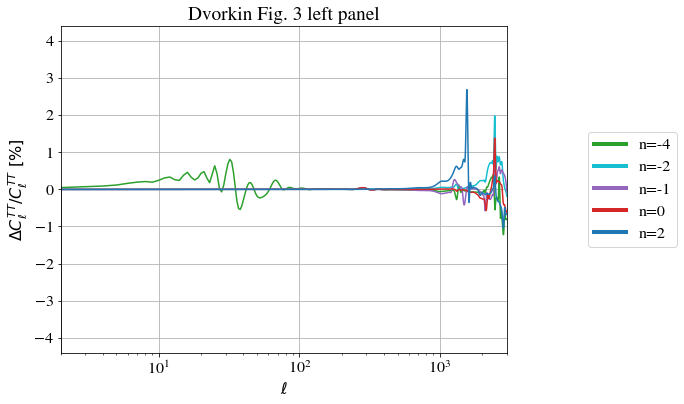

In [11]:
#
#################
#
# start plotting
#
#################
#
plt.xlim([2,3000])
plt.ylim([-4.4,4.4])
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\Delta C^{TT}_\ell/C^{TT}_\ell\,\,[\%]$")
plt.title(r"Dvorkin Fig. 3 left panel")
plt.grid()
#
print(cls[0][1]['tt'])
ell = cls[0][1]['ell']
norm = cls[0][1]['tt']
norm[0] = 1e-30
norm[1] = 1e-30

colors = ['tab:green', 'tab:cyan', 'tab:purple', 'tab:red', 'tab:blue']
# plt.loglog(ell, norm,'tab:gray', label=cls[0][0])
# plt.loglog(ell, cls[1][1]['tt'],'tab:green',label='n=-4')
for color, data in zip(colors, cls[1:]):
    plt.plot(ell,(data[1]['tt']-norm)/norm*1000000,color,label=data[0])
    
plt.xscale('log')
# plt.loglog(ell,factor*cls['ee'],'b-',label=r'$\mathrm{EE(s)}$')
leg = plt.legend(loc='right', markerscale=15, bbox_to_anchor=(1.4, 0.5))


for line in leg.get_lines():
    line.set_linewidth(4.0)

In [12]:
plt.savefig('cl_ST.pdf',bbox_inches='tight')

<Figure size 576x432 with 0 Axes>

In [13]:
# 